noshowappointments


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# Load the dataset
df = pd.read_csv('D:\\Downloads\\medica dataset.csv')

In [3]:
print(df.head())
print(df.info())
print(df.describe())

      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589980e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262960e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679510e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841190e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0      

In [4]:
print(df.isnull().sum())

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


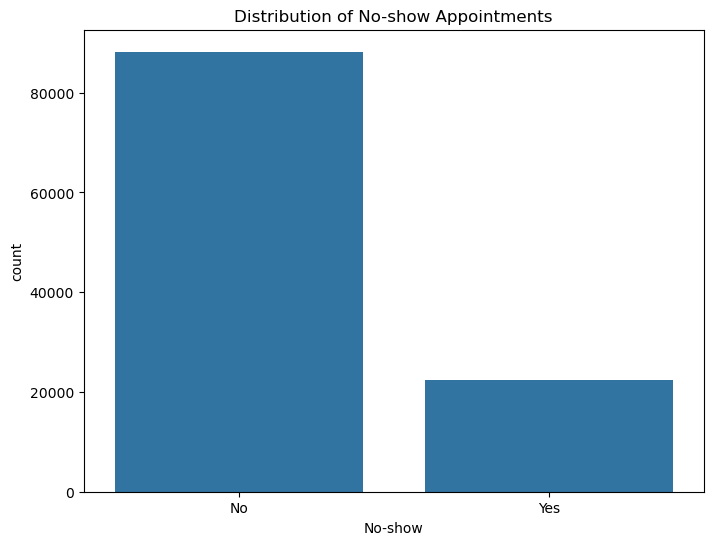

In [5]:
plt.figure(figsize=(8,6))
sns.countplot(x='No-show', data=df)
plt.title('Distribution of No-show Appointments')
plt.show()

In [6]:
df['No-show'] = df['No-show'].map({'Yes': 1, 'No': 0})

In [7]:
numerical_features = ['Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']
categorical_features = ['Gender', 'Neighbourhood']

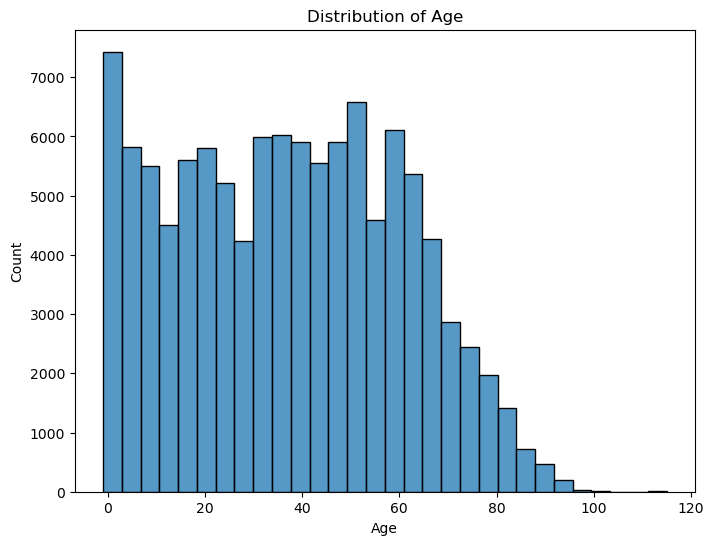

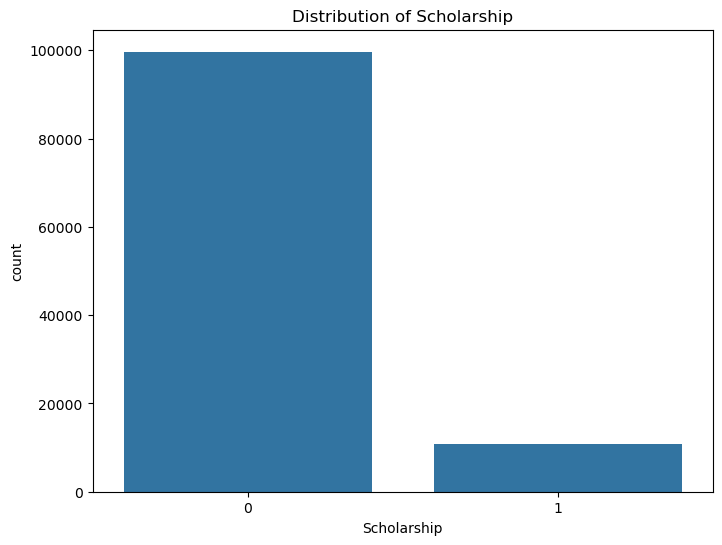

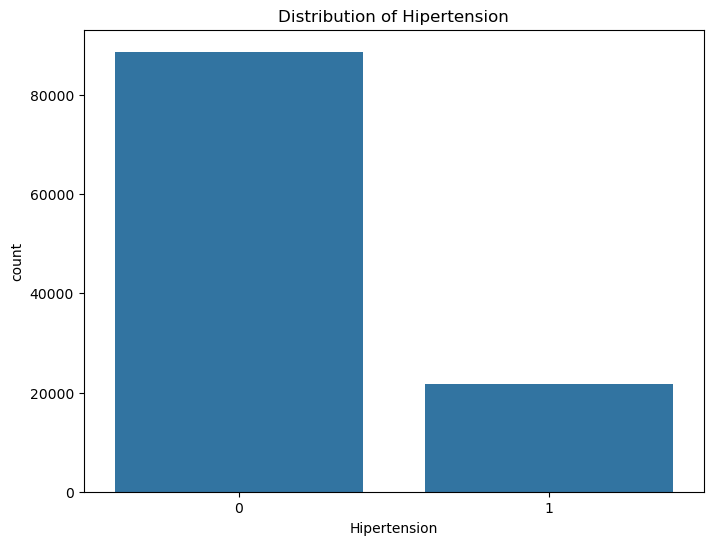

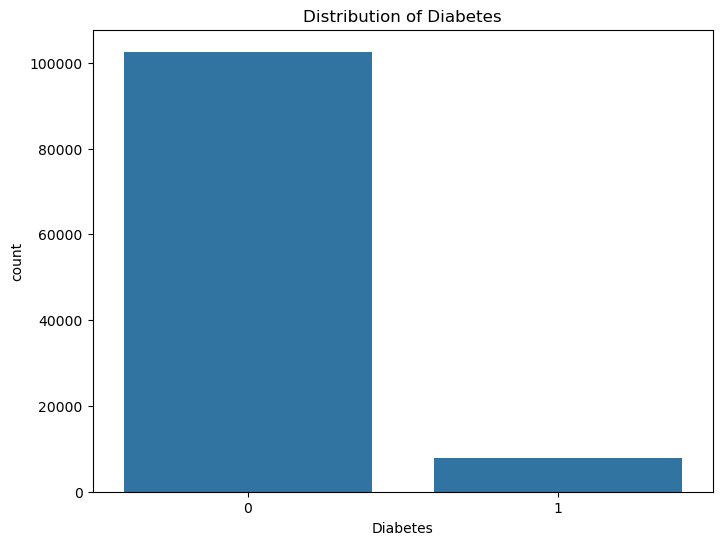

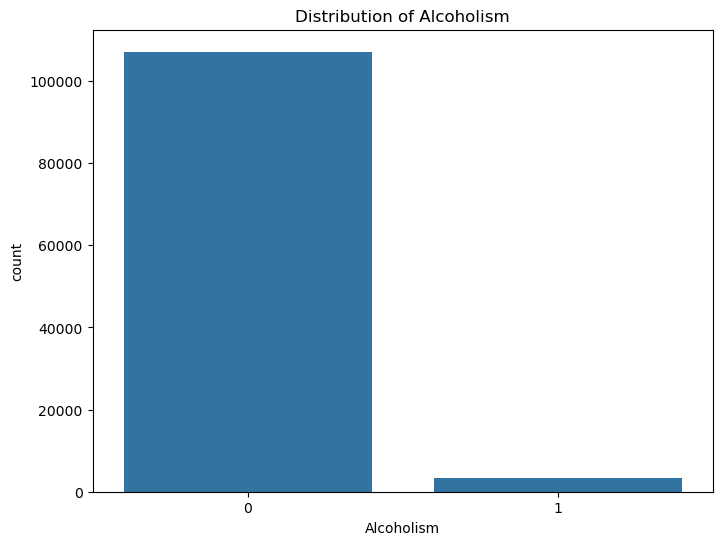

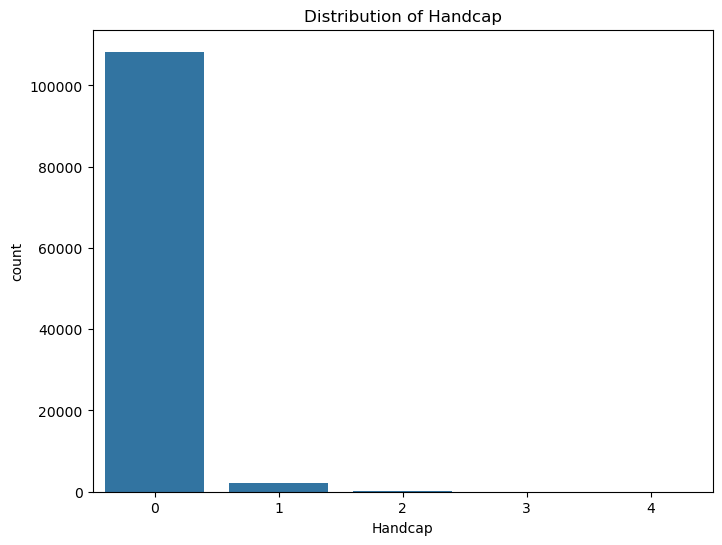

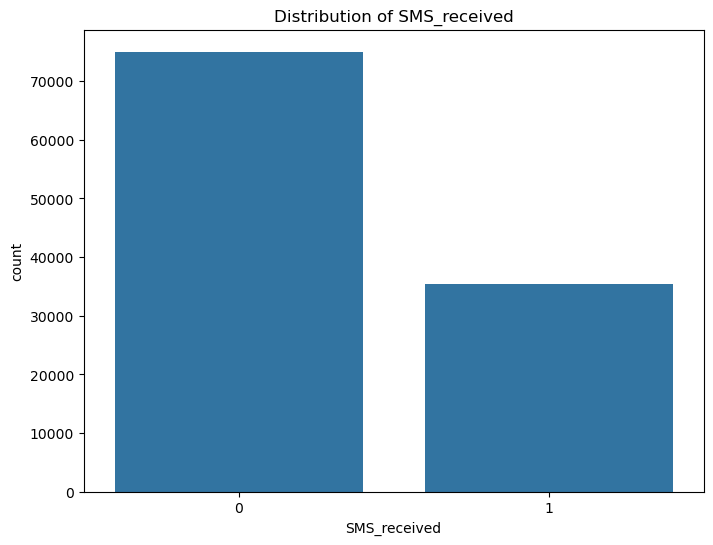

In [8]:
for feature in numerical_features:
    plt.figure(figsize=(8,6))
    if feature == 'Age':
        sns.histplot(df[feature], bins=30)
    else:
        sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of {feature}')
    plt.show()

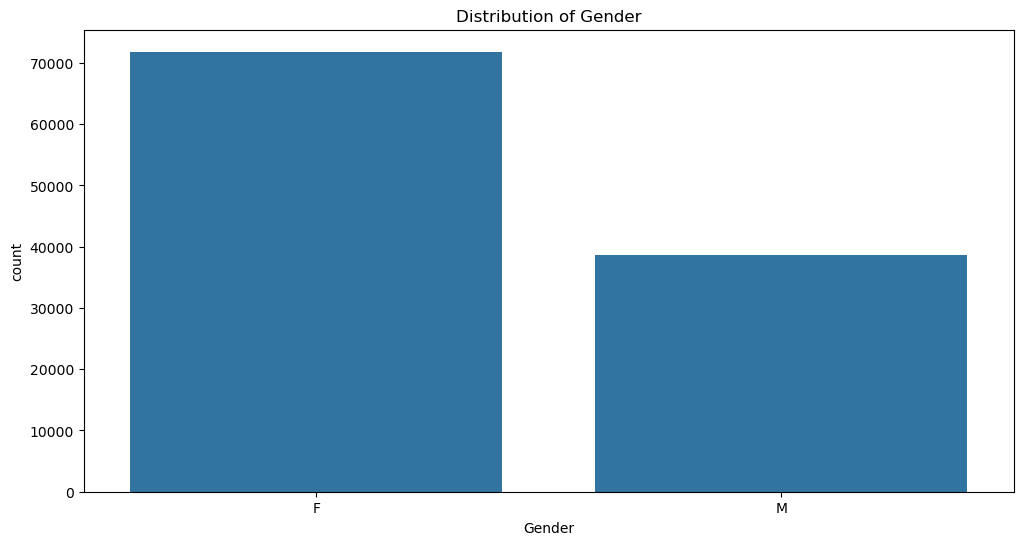

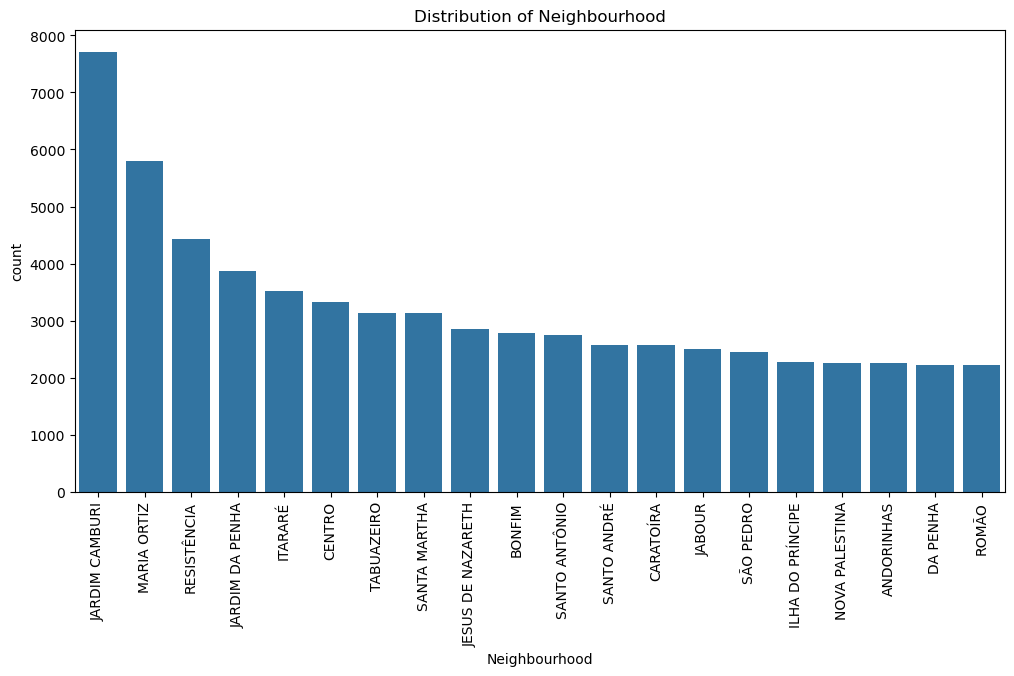

In [9]:
for feature in categorical_features:
    plt.figure(figsize=(12,6))
    if feature == 'Neighbourhood':
        # For neighborhoods with many categories, show top 20
        top_neighborhoods = df[feature].value_counts().nlargest(20).index
        sns.countplot(x=feature, data=df[df[feature].isin(top_neighborhoods)], order=top_neighborhoods)
        plt.xticks(rotation=90)
    else:
        sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of {feature}')
    plt.show()

In [10]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [11]:
df['DaysWaiting'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

In [12]:
df = df[df['DaysWaiting'] >= 0]

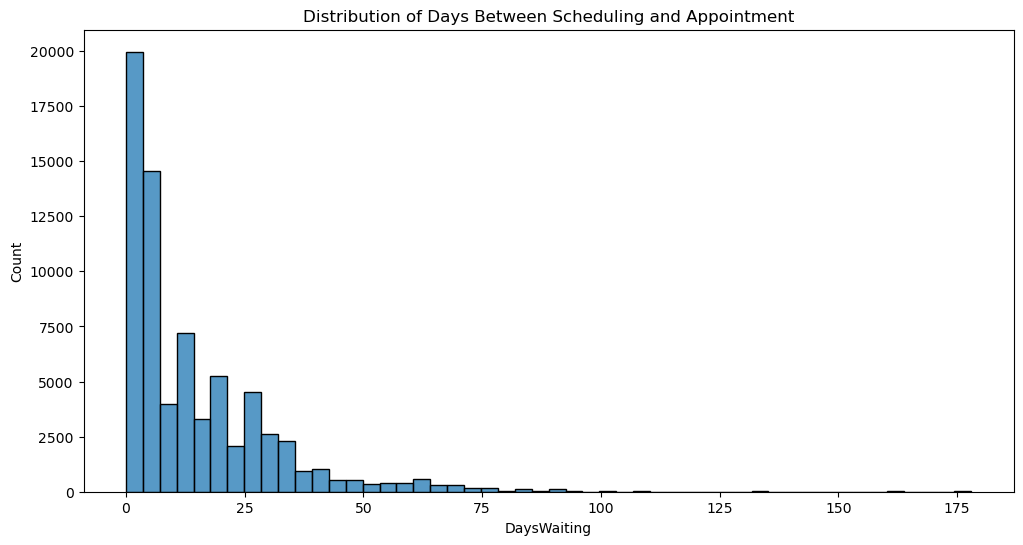

In [13]:
plt.figure(figsize=(12,6))
sns.histplot(df['DaysWaiting'], bins=50)
plt.title('Distribution of Days Between Scheduling and Appointment')
plt.show()

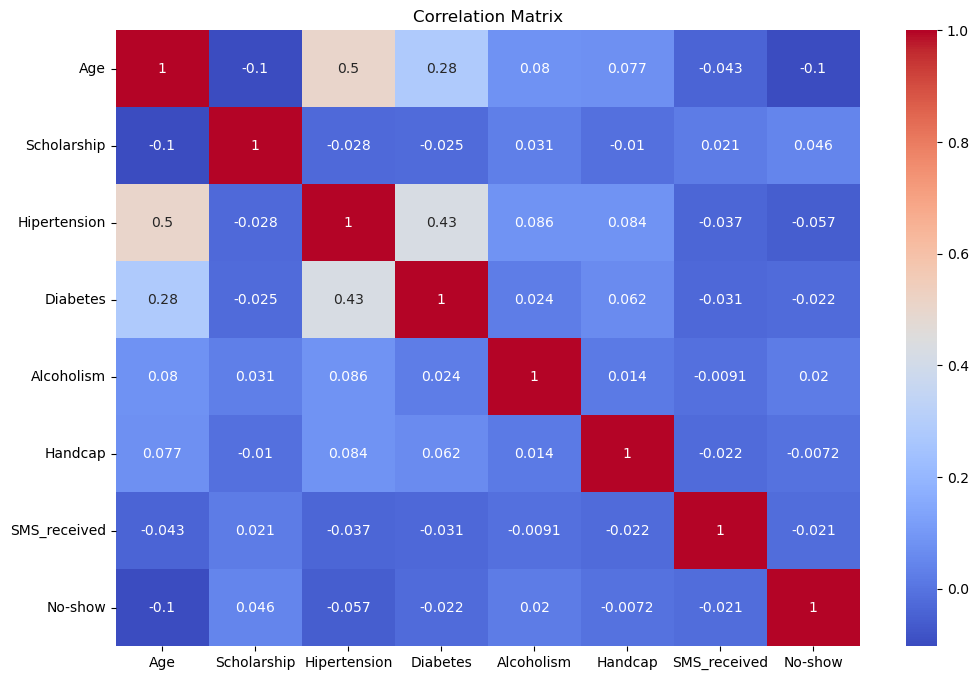

In [14]:
plt.figure(figsize=(12,8))
corr_matrix = df[numerical_features + ['No-show']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [15]:
df['SameDay'] = (df['DaysWaiting'] == 0).astype(int)

In [16]:
df['AppointmentDayOfWeek'] = df['AppointmentDay'].dt.day_name()

In [17]:
df = df.drop(['ScheduledDay', 'AppointmentDay', 'PatientId', 'AppointmentID'], axis=1)

In [18]:
numerical_features = ['Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 
                     'SMS_received', 'DaysWaiting', 'SameDay']
categorical_features = ['Gender', 'Neighbourhood', 'AppointmentDayOfWeek']

In [19]:
X = df.drop('No-show', axis=1)
y = df['No-show']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [20]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

In [21]:
knn_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', KNeighborsClassifier())])

In [22]:
knn_pipe.fit(X_train, y_train)
y_pred = knn_pipe.predict(X_test)

print("Base KNN Model Performance:")
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Base KNN Model Performance:
              precision    recall  f1-score   support

           0       0.73      0.85      0.79     15431
           1       0.36      0.21      0.27      6157

    accuracy                           0.67     21588
   macro avg       0.55      0.53      0.53     21588
weighted avg       0.63      0.67      0.64     21588

ROC AUC Score: 0.531043157357423
Accuracy: 0.6693070224198628


Base KNN Model Performance:
              precision    recall  f1-score   support

           0       0.73      0.85      0.79     15431
           1       0.36      0.21      0.27      6157

    accuracy                           0.67     21588
   macro avg       0.55      0.53      0.53     21588
weighted avg       0.63      0.67      0.64     21588

ROC AUC Score: 0.531043157357423
Accuracy: 0.6693070224198628


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11, 15],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__p': [1, 2]  # 1 for manhattan, 2 for euclidean
}

grid_search = GridSearchCV(knn_pipe, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

In [ ]:
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)
y_proba = best_knn.predict_proba(X_test)[:,1]

In [ ]:
print("\nOptimized KNN Model Performance:")
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
print("Accuracy:", accuracy_score(y_test, y_pred))

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()